<a href="https://colab.research.google.com/github/ramonmurias/Trabajos_Algoritmos_Optimizacion/blob/main/Algoritmos_R1_Vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Reto 1

Nombre: Ramón Murias \\
Github: https://github.com/ramonmurias/Trabajos_Algoritmos_Optimizacion

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [ ]:
# Torres de Hanoi
def hanoi(nFichas, origen, medio, destino):
  '''
Comencemos por definir una función llamada hanoi que tomará cuatro
argumentos: el número de discos (nFichas), y los nombres de las tres torres
(origen, destino, medio).
  '''
  if nFichas == 1:
    print("Hay que  mover {} de {} a {}".format(nFichas, origen, destino))
    return
  '''
En primer lugar, necesitamos manejar el caso base de nuestra recursión, que es
cuando solo hay un disco en la torre. En este caso, simplemente imprimimos el
movimiento necesario para mover el disco de la torre de origen a la torre de
destino.
  '''
  hanoi(nFichas - 1, origen, medio, destino)
  print("Mover disco {} de {} a {}".format(nFichas, origen, destino))
  hanoi(nFichas - 1, medio, destino, origen)
  '''
Ahora viene la parte recursiva. Llamaremos recursivamente a la función hanoi
dos veces:
La primera llamada moverá los nFichas-1 discos superiores de la torre de origen
a la torre medio, utilizando la torre de destino como torre de destino temporal.
La segunda llamada moverá el disco restante (el más grande) de la torre de
origen a la torre de destino.
Finalmente, la tercera llamada moverá los nFichas-1 discos de la torre medio a
la torre de destino, utilizando la torre de origen como torre de origen temporal
  '''

num_discos = 3
hanoi(num_discos, 'A', 'B', 'C')

Hay que  mover 1 de A a C
Mover disco 2 de A a C
Hay que  mover 1 de B a A
Mover disco 3 de A a C
Hay que  mover 1 de B a A
Mover disco 2 de B a A
Hay que  mover 1 de C a B


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

In [ ]:
#Sucesión_de_Fibonacci
def fiboItera(n):
  '''
  Definimos los casos de salida borde
  '''
  if n <= 0:
    print("Número no valido, ingresar n > 0.")
  if n == 1:
    return 1
  if n == 2:
    return 1
  indexAux = [0,1]
  valueAux = [1,1]
  for i in range(2,n):
    suma = sum(valueAux[len(valueAux)-2:])
    valueAux.append(suma)
    indexAux.append(i)
  '''
  Acá vamos sumando los elementos del vector, haciendo una suerte de cumsum()
  y finalmente al seleccionar los últimos dos elementos, podremos generar
  el (n+1) elemento
  '''
  return valueAux[len(valueAux)-1]

print(fiboItera(30))
print(fiboItera(35))

9227465

In [ ]:
def fiboRecursi(n):
  '''
  Definimos los casos de salida borde y luego llamamos a la forma recursiva
  que en el caso de la secuencia de Fibonacci es bastante directa.
  '''
  if n == 1:
    return 1
  if n == 2:
    return 1
  else:
    return fiboRecursi(n-1) + fiboRecursi(n-2)

print(fiboRecursi(30))
print(fiboRecursi(35))

9227465

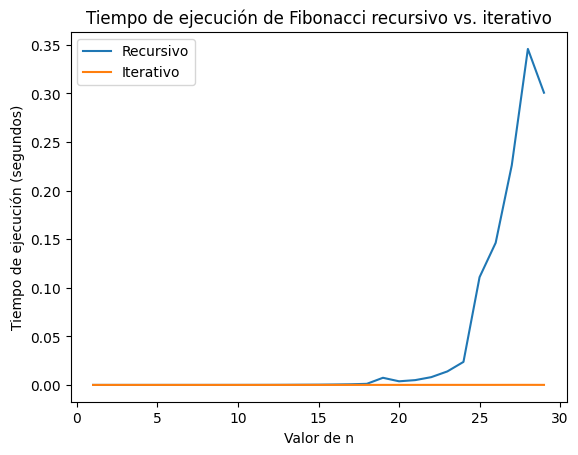

In [ ]:
import matplotlib.pyplot as plt
import time

# Generar los números de Fibonacci y medir el tiempo de ejecución para cada valor de n
fib_recursive_times = []
fib_iterative_times = []
n_values = range(1, 30)  # Probamos hasta acá porque después suben mucho el consumo

for n in n_values:
    # Medir el tiempo de ejecución para la función recursiva
    start_time_recursive = time.time()
    fiboRecursi(n)  # Llama a función recursiva
    end_time_recursive = time.time()
    fib_recursive_times.append(end_time_recursive - start_time_recursive)

    # Medir el tiempo de ejecución para la función iterativa
    start_time_iterative = time.time()
    fiboItera(n)  # Llama a función iterativa
    end_time_iterative = time.time()
    fib_iterative_times.append(end_time_iterative - start_time_iterative)

# Graficar los resultados
plt.plot(n_values, fib_recursive_times, label='Recursivo')
plt.plot(n_values, fib_iterative_times, label='Iterativo')
plt.xlabel('Valor de n')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de Fibonacci recursivo vs. iterativo')
plt.legend()
plt.show()

Donde podemos ver que para valores $n$ pequeños, los tiempos son bastante similares, pero ya a medida que va avanzando $n$, el tiempo de la alternativa recursiva se dispara con respecto a su par iterativo.

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [3]:
# Problema del cambio de moneda
def cambioMoneda(saldo, monedas):
  # Ordenamos las monedas de mayor a menor
  monedas.sort(reverse=True)
  # Inicializamos la lista para contar cuántas monedas de cada denominación se usan
  monedasValue = [0] * len(monedas)

  # Iteramos sobre cada moneda empezando por la de mayor valor
  for i in range(len(monedas)):
    # Mientras la moneda actual sea menor o igual al saldo restante
    while monedas[i] <= saldo:
      # Incrementamos el contador de esta moneda
      monedasValue[i] += 1
      # Reducimos el saldo restante en el valor de la moneda
      saldo -= monedas[i]

  # Recopilamos los índices de las monedas que se usaron (aquellas cuyo contador es mayor a 0)
  finalIndex = [i for i, count in enumerate(monedasValue) if count > 0]
  # Recopilamos las cantidades de monedas usadas
  monedasUsadas = [monedasValue[i] for i in finalIndex]
  # Recopilamos los valores de las monedas usadas
  valoresMonedas = [monedas[i] for i in finalIndex]

  # Imprimimos la cantidad de monedas usadas de cada denominación
  print("Monedas usadas:", monedasUsadas)
  # Imprimimos los valores de las monedas usadas
  print("Valores de monedas:", valoresMonedas)

  # Retornamos el saldo restante (debería ser 0 si se puede hacer el cambio exacto)
  return saldo

# Ejemplo de uso
saldo = 87
monedas = [1, 5, 10, 25]
cambioMoneda(saldo, monedas)

Monedas usadas: [3, 1, 2]
Valores de monedas: [25, 10, 1]


0

## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [2]:
# Problema de las N-Reinas
def es_seguro(tablero, fila, col, N):
    # Verifica si es seguro colocar una reina en la posición (fila, col)

    # Verifica la columna actual
    for i in range(fila):
        if tablero[i] == col:
            return False

    # Verifica la diagonal principal
    for i in range(fila):
        if tablero[i] - i == col - fila:
            return False

    # Verifica la diagonal secundaria
    for i in range(fila):
        if tablero[i] + i == col + fila:
            return False

    # Si no hay conflictos, la posición es segura
    return True

def N_Reinas(N):
    # Función principal para resolver el problema de las N-Reinas

    def backtrack(fila):
        # Función recursiva que intenta colocar una reina en cada fila
        if fila == N:
            # Si todas las reinas están colocadas (base del caso recursivo)
            soluciones.append(tablero[:])  # Agrega una copia de la solución actual
            return

        for col in range(N):
            # Itera sobre todas las columnas para la fila actual
            if es_seguro(tablero, fila, col, N):
                # Si es seguro colocar la reina en (fila, col)
                tablero[fila] = col  # Coloca la reina en la columna actual
                backtrack(fila + 1)  # Llama recursivamente para la siguiente fila
                tablero[fila] = -1  # Realiza el backtracking (quita la reina)

    tablero = [-1] * N  # Inicializa el tablero con -1 indicando posiciones vacías
    soluciones = []  # Lista para almacenar todas las soluciones
    backtrack(0)  # Comienza el proceso de backtracking desde la fila 0
    return soluciones  # Retorna todas las soluciones encontradas

# Ejemplo de uso
N = 4
soluciones = N_Reinas(N)
print(f"Se encontraron {len(soluciones)} soluciones para un tablero de {N}x{N}:")
N = 7
soluciones = N_Reinas(N)
print(f"Se encontraron {len(soluciones)} soluciones para un tablero de {N}x{N}:")

Se encontraron 2 soluciones para un tablero de 4x4:
Se encontraron 40 soluciones para un tablero de 7x7:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Algoritmos_R1_VF.ipynb"

from google.colab import files
files.download("/content/drive/MyDrive/Colab Notebooks/Algoritmos_R1_VF.html")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Algoritmos_R1_Vf.ipynb to html
[NbConvertApp] Writing 656698 bytes to /content/drive/MyDrive/Colab Notebooks/Algoritmos_R1_Vf.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>